In [2]:
# compare the Nsegment distribution for MC in different years
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [5]:
start_t = time.time()
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()
path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/V1p7/MC_Summer16/v11/v7/'
bkg_path = path+"/bkg/wH/normalized/"
# fpath_bkg['QCD'] = bkg_path+"QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['DYJetsToLL'] = bkg_path+"DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_DiLept'] = bkg_path+"TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_SingleLeptFromTbar'] = bkg_path+"TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_SingleLeptFromT'] = bkg_path+"TTJets_SingleLeptFromT_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['ZJetsToNuNu'] = bkg_path+"ZJetsToNuNu_Zpt-100toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
fpath_bkg['WJetsToLNu2016'] = bkg_path+"WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"

path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/V1p7/MC_Fall17/v12/v7/'
bkg_path = path+"/bkg/wH/normalized/"
fpath_bkg['WJetsToLNu2017'] = bkg_path+"WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
lumi = 1

# if year == 2016:lumi = 35.92*1000 #in pb-1
# elif year == 2017:lumi = 41.53 * 1000
# else: lumi = 59.74 * 1000

# start_t = time.time()
# data_year = 2016
# if data_year == 2016:lumi = 35.92*1000 #in pb-1
# elif data_year == 2017:lumi = 41.53 * 1000
# else: lumi = 59.74 * 1000
    
# data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/V1p7/Data'+str(data_year)+'/v12/v5/wH/normalized/'
# fpath_bkg['SingleElectron2016'] = data_path + 'SingleElectron.root'
# # if data_year == 2018:
# #     fpath_bkg['SingleElectron'] = data_path + 'EGamma.root'
# # else:
# #     fpath_bkg['SingleElectron'] = data_path + 'SingleElectron.root'

# data_year = 2017
# data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/V1p7/Data'+str(data_year)+'/v12/v5/wH/normalized/'
# fpath_bkg['SingleElectron2017'] = data_path + 'SingleElectron.root'


NEvents = {}


for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
#     if k[:7] == 'ntuples':
#         tree_bkg[k] = root_dir['ntuples']['llp']
#         NEvents[k] = root_dir['ntuples']['NEvents'][1]
#     else:
    tree_bkg[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["weight"].array()
    print("NEvents",NEvents[k])
    print ('weights',np.unique(a)*lumi)
    print(np.sum(a))
    print(len(a))
#     print(len(a)/ NEvents[k])
#     print(a.shape)
print(time.time()-start_t)

WJetsToLNu2016 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/V1p7/MC_Summer16/v11/v7//bkg/wH/normalized/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root
NEvents 256029660.0
weights [-0.00034951  0.00034951]
1805.3765
7710545
WJetsToLNu2017 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/V1p7/MC_Fall17/v12/v7//bkg/wH/normalized/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root
NEvents 21803684.0
weights [-0.00257067  0.00257067]
349.82654
136086
5.5193939208984375


# Load trigger

In [7]:
trigger_names_file = '/nfshome/christiw/llp/delayed_jet_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
if wH:
    trigger_paths = [87,135] #PFMET120
#     elif data_year == 2017: trigger_paths = [87,136] #PFMET120
else:
    trigger_paths = [177,362,87,135] #PFMET120

xsec = {}
xsec['bbbb10m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb1m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb0.1m'] = (5.328E-01 + 8.4E-01) *0.324


xsec['WJetsToLNu'] = 61526.7

legend = {}
legend['bbbb10m'] = 'signal c#tau = 10 m'
legend['bbbb1m'] = 'signal c#tau = 1 m'
legend['bbbb0.1m'] = 'signal c#tau = 0.1 m'

legend['SingleElectron'] = 'SingleElectron'
legend['SingleMuon'] = 'SingleMuon'
legend['WJetsToLNu'] = 'WJetsToLNu'

# Helper Functions

In [ ]:
import math
def deltaPhi( phi1,  phi2):

    dphi = phi1-phi2
    while (dphi > math.pi):
        dphi -= 2*math.pi
  
    while (dphi <= -math.pi):
        dphi += 2*math.pi
    return dphi
def deltaR(eta1, phi1, eta2, phi2):
    dphi = deltaPhi(phi1,phi2)
    deta = eta1 - eta2
    return (dphi*dphi + deta*deta)**0.5

# nCsc with different hit vetoing

In [10]:
start_t = time.time()
pdgId = 13
JET_PT_CUT = 10
MUON_PT_CUT = 20


weight = {}
nCsc = {}
nCsc_JetMuonVetoCluster0p4_Me1112Veto = {}
cscClusterSize = {}


selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
for k,T in tree_bkg.items():
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
########### SELECTION: CLUSTERS ############

    ###### OOT control region #####

    sel_cluster_temp = T.array('cscClusterMaxStationRatio')*T.array('cscClusterSize') > 5.01
    sel_cluster_temp = np.logical_and( sel_cluster_temp, T.array('cscClusterJetVeto') < JET_PT_CUT)
    sel_cluster_temp = np.logical_and( sel_cluster_temp, T.array('cscClusterMuonVeto') < MUON_PT_CUT)

#     selections_cluster['test'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < -53)
#     selections_cluster['test'] = np.logical_and(selections_cluster['test'], T.array('cscClusterTime') > -87.5)
    
#     selections_cluster['oot1'] = np.logical_and(sel_cluster_temp, T.array('cscT') > -62.5)
#     selections_cluster['oot1'] = np.logical_and(sel_cluster_temp, T.array('cscT') < -28)
#     selections_cluster['oot2'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < -12.5)
#     selections_cluster['oot2'] = np.logical_and(selections_cluster['oot2'], T.array('cscClusterTime') > -37.5)

#     selections_cluster['oot3'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < 72)
#     selections_cluster['oot3'] = np.logical_and(selections_cluster['oot3'], T.array('cscClusterTime') > 37.5)
    
#     selections_cluster['oot4'] = np.logical_and(sel_cluster_temp, T.array('cscClusterTime') < 97)
#     selections_cluster['oot4'] = np.logical_and(selections_cluster['oot4'], T.array('cscClusterTime') > 62.5)
    
#     selections_cluster['oot_total'] = np.logical_or(selections_cluster['oot1'], selections_cluster['oot2'])
#     selections_cluster['oot_total'] = np.logical_or(selections_cluster['oot_total'], selections_cluster['oot3'])
#     selections_cluster['oot_total'] = np.logical_or(selections_cluster['oot_total'], selections_cluster['oot4'])

#     print("-3 bunch crossing", np.count_nonzero(selections_cluster['test'].flatten()))
#     print("-2 bunch crossing",np.count_nonzero(selections_cluster['oot1'].flatten()))
#     print("-1 bunch crossing",np.count_nonzero(selections_cluster['oot2'].flatten()))
#     print("+2 bunch crossing",np.count_nonzero(selections_cluster['oot3'].flatten()))
#     print("+3 bunch crossing",np.count_nonzero(selections_cluster['oot4'].flatten()))


    sel_cluster = sel_cluster_temp


    ###### in time control region #####
    
#     sel_cluster = T.array('cscClusterJetVeto') > JET_PT_CUT
#     sel_cluster = np.logical_or( sel_cluster, T.array('cscClusterMuonVeto') > MUON_PT_CUT)
#     sel_cluster = np.logical_and( sel_cluster, T.array('cscClusterMe1112Ratio') > 0.01)
#     sel_cluster = np.logical_and( sel_cluster, T.array('cscClusterTime') > -12.5)
#     sel_cluster = np.logical_and( sel_cluster, T.array('cscClusterTime') < 22) 
            
########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev  = np.logical_or(sel_ev,hlt[:,tr])
    sel_muon = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=25)
    sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepEta'))<2.4)
    sel_muon = np.logical_and(sel_muon, np.abs(T.array('lepPdgId')) == 13)

    sel_ele = np.logical_and(T.array('lepPassId'), T.array('lepPt')>=35)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepEta'))<2.4)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepPdgId')) == 11)
    
#     sel_lep = np.logical_or(sel_ele, sel_muon)
    if pdgId == 13:
        sel_lep = sel_muon
    else: 
        sel_lep = sel_ele
    sel_ev = np.logical_and(sel_ev, sel_lep.sum() == 1)
    ##### jet veto #####
#     sel_jetveto = np.logical_and(sel_ev, (sel_cluster.sum()) >= 1)

    nCsc[k] = T.array('nCsc')[sel_ev]
    cscClusterSize[k] =  T.array('cscClusterSize')[sel_cluster][sel_ev]

    if k[:6] == 'Single' or k == 'EGamma':
        weight[k] = T.array('weight')[sel_ev]
    else:
        weight[k] = T.array('weight')[sel_ev]*lumi

    nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] = cscClusterSize[k].count()
    print(k)
print(time.time()-start_t)

WJetsToLNu2016
WJetsToLNu2017
75.04844117164612


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


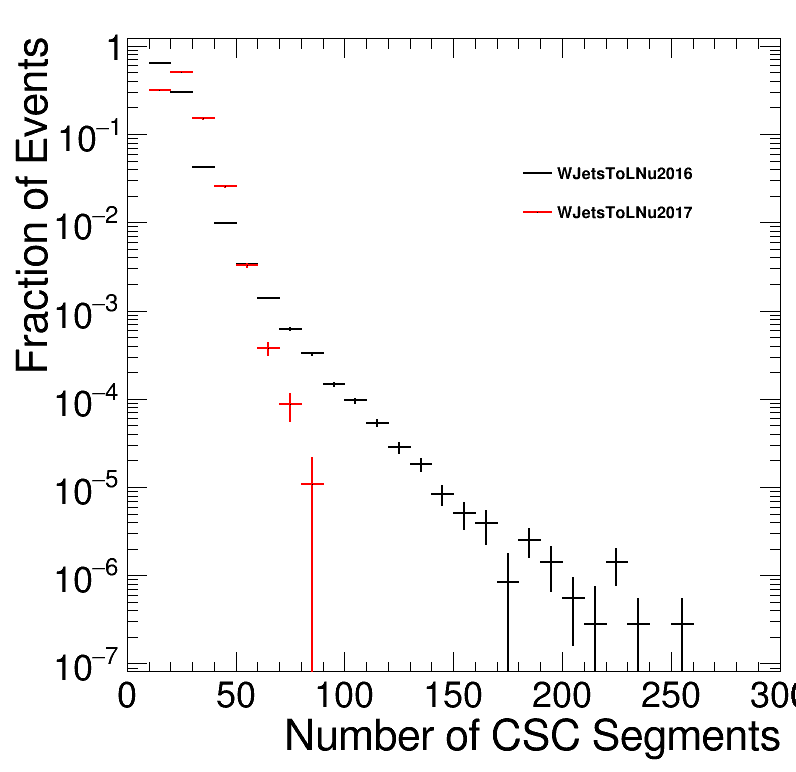

In [23]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.65,0.70,0.85,0.80)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h = {}


i = 0
for k,v in nCsc.items():
    h[k] = create_TH1D( nCsc[k], axis_title=['Number of CSC Segments', 'Fraction of Events'], name=k, binning=[30,0,300],weights = weight[k])
#     h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], axis_title=['Number of CSC Segments', 'Fraction of Events'], name=k, binning=[30,0,300],weights = weight[k])

    h[k].SetLineColor(std_color_list[i])
    leg.AddEntry(h[k],k)
    h[k].DrawNormalized('same')
    i+=1
c.SetLogy()
leg.Draw()
c.Draw()

# Data/MC Ratio plot

82481.0

****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      1.60063
Chi2                      =      2.79639
NDf                       =           14
Edm                       =  1.77929e-11
NCalls                    =           92
Constant                  =      14.0168   +/-   0.43072     
Slope                     =    -0.355359   +/-   0.0182138   

0.9993823241264835
68163.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


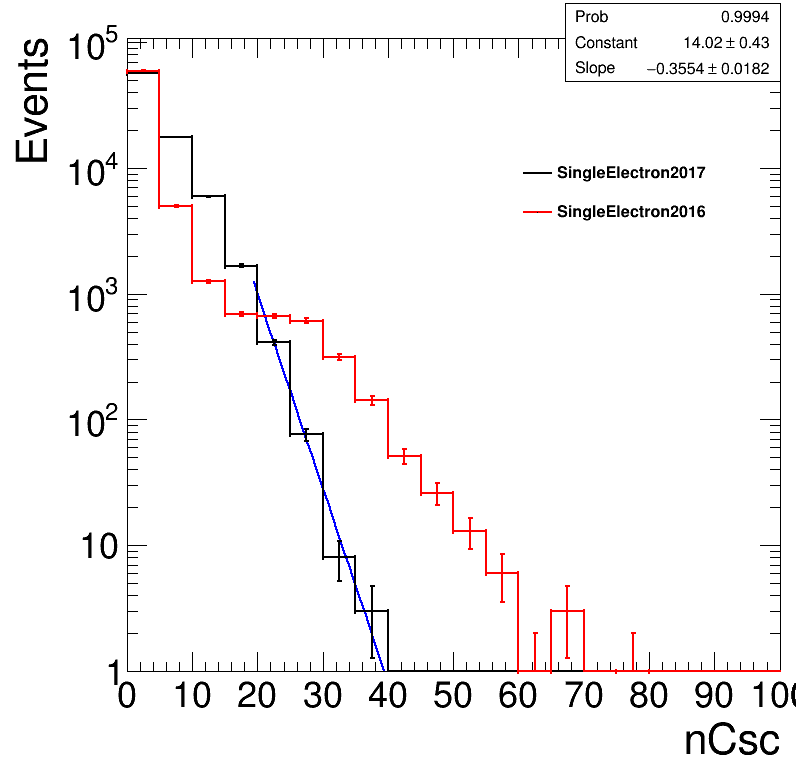

In [25]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()
leg = rt.TLegend(0.65,0.70,0.85,0.80)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)


h = {}
rt.gStyle.SetOptFit(1011)
if pdgId == 13: data = 'SingleMuon'
else: data = 'SingleElectron'
mc = 'WJetsToLNu'
keys = ['SingleElectron2017', 'SingleElectron2016']
for i,k in enumerate(keys):
#     w = cscClusterNLayer[k]*0.0 + weight[k]
#     print(len(w.flatten()))
#     print(len(cscClusterNLayer[k].flatten()))
#     h[k] = create_TH1D( cscClusterNLayer[k].flatten(), axis_title=['cluster station', 'Events'], name=k, binning=[10,0,10],weights = w.flatten())
#     h[k] = create_TH1D( nCscClusters[k], axis_title=['Number of Clusters', 'Events'], name=k, binning=[10,0,10],weights = weight[k])

#     h[k] = create_TH1D( cscClusterNLayer[k].sum(), axis_title=['Number of Stations per Event', 'Events'], name=k, binning=[10,0,10],weights = weight[k])
    print(np.sum(weight[k]))

#     print(len(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]))
    h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], axis_title=['nCsc', 'Events'], name=k, binning=[20,0,100],weights = weight[k])
#     h[k] = create_TH1D( cscClusterTime[k][:,0], axis_title=['csc cluster time [ns]', 'Events'], name=k, binning=[30,-100,-12.5],weights = weight[k])

    h[k].SetLineColor(std_color_list[i])
    leg.AddEntry(h[k], k)
#     h[k].SetMinimum(1)

    if k == 'SingleElectron2017':
        r = h[k].Fit('expo', 'LRSQ+', '', 19,120)
        print(r.Get())
        print(r.Prob())
        h[k].GetFunction("expo").SetLineColor(std_color_list[2])
        h[k].GetFunction("expo").SetLineWidth(2)


    h[k].Draw('E1 same hist')
#     h[k].Draw('E1' if i == 0 else '')

# c = make_ratio_plot([h[mc],h[data]], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
# c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()

    
    


# c.Draw()
# print(time.time()-start_t)